<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [75]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [76]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [77]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [78]:
# Drop the superfluous index column
boston_df = boston_df.drop('Unnamed: 0', axis=1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


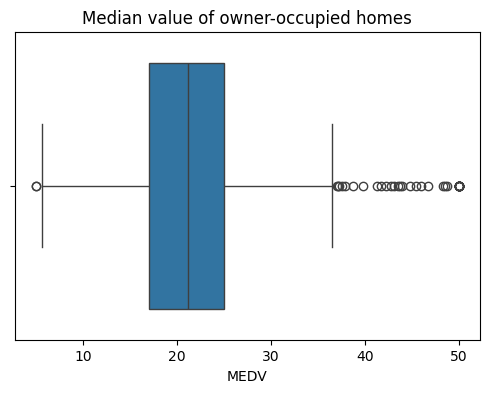

In [79]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(6,4))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

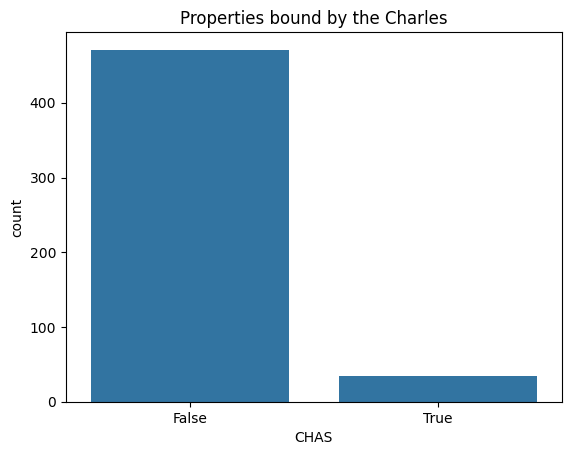

In [80]:
#Provide a bar plot for the Charles river variable

#Count properties bound/not bound by the Charles
chas = boston_df['CHAS'].value_counts().reset_index()
#Change labels to bool
chas['CHAS'] = chas['CHAS'].astype(bool)

sns.barplot(data=chas, x='CHAS', y='count')
pyplot.title('Properties bound by the Charles')
pyplot.show()


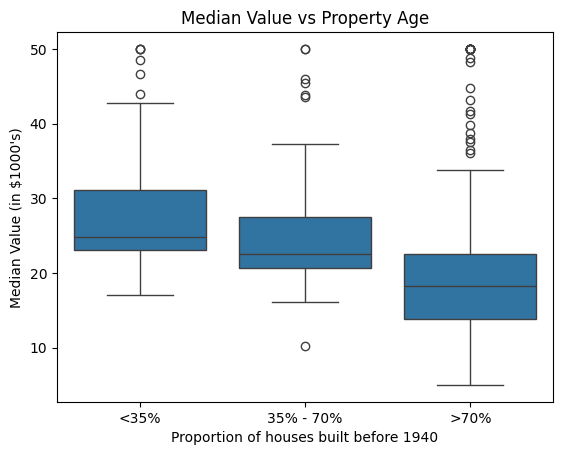

In [81]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Create AGE_GROUP column discretizing AGE into '<35%', '35% - 70%' & '>70%' groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], \
                                bins=[0,35,70,100], \
                                labels=['<35%', '35% - 70%', '>70%'], \
                                include_lowest=True
                                )

#Draw a boxplot of MEDV vs AGE_GROUP
sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
pyplot.title('Median Value vs Property Age')
pyplot.xlabel('Proportion of houses built before 1940')
pyplot.ylabel('Median Value (in $1000\'s)')
pyplot.show()

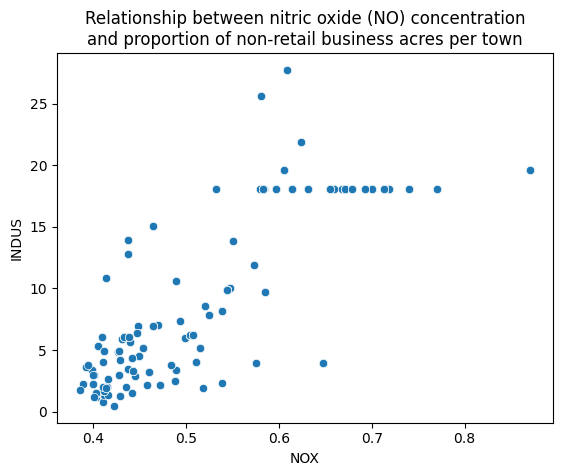

There appears to be a positive correlation between NO concentrations and industrial acreage.


In [82]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
pyplot.title('Relationship between nitric oxide (NO) concentration\nand proportion of non-retail business acres per town')
pyplot.show()

#What can you say about the relationship?
print('There appears to be a positive correlation between NO concentrations and industrial acreage.')

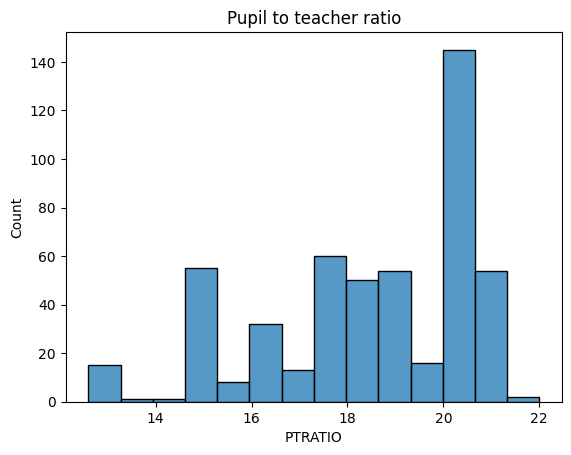

In [83]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x='PTRATIO')
pyplot.title('Pupil to teacher ratio')
pyplot.show()

In [84]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#State hyporheses
print('Null hypothesis H_0: THERE IS NO DIFFERENCE IN MEDIAN VALUE FOR HOUSES BOUNDED OR NOT BOUNDED BY THE CHARLES.\n')
print('Alternative hypothesis H_a: THERE IS A DIFFERENCE IN MEDIAN VALUE BETWEEN HOUSES BOUNDED BY THE RIVER AND HOUSES THAT ARE NOT.\n')

#Run the T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


Null hypothesis H_0: THERE IS NO DIFFERENCE IN MEDIAN VALUE FOR HOUSES BOUNDED OR NOT BOUNDED BY THE CHARLES.

Alternative hypothesis H_a: THERE IS A DIFFERENCE IN MEDIAN VALUE BETWEEN HOUSES BOUNDED BY THE RIVER AND HOUSES THAT ARE NOT.



TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [85]:
#State conclusions
print('RESULTS ANALYSIS: Since the P-value of 7.39E-5 is lower than our significance level (alpha) of .05, we can REJECT the null hypothesis and conclude that THERE IS A STATISTICALLY SIGNIFICANT DIFFERENCE IN MEDIAN VALUES BETWEEN HOUSES BOUNDED BY THE CHARLES AND HOUSES THAT ARE NOT at the 95% confidence level (alpha = .05)')

RESULTS ANALYSIS: Since the P-value of 7.39E-5 is lower than our significance level (alpha) of .05, we can REJECT the null hypothesis and conclude that THERE IS A STATISTICALLY SIGNIFICANT DIFFERENCE IN MEDIAN VALUES BETWEEN HOUSES BOUNDED BY THE CHARLES AND HOUSES THAT ARE NOT at the 95% confidence level (alpha = .05)


In [91]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#State hypotheses
print('Null hypothesis H_0: THERE IS NO DIFFERENCE IN MEDIAN VALUES BY AGE.\n')
print('Alternative hypothesis H_a: THERE IS A DIFFERENCE IN MEDIAN VALUES BY AGE.\n')

#Test for equality of variance (Levene)
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '<35%']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '35% - 70%']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '>70%']['MEDV'], 
                   center='mean')
#P-value > .05, therefore equal variance can be assumed
#Separate the three samples
lower = boston_df[boston_df['AGE_GROUP'] == '<35%']['MEDV']
middle = boston_df[boston_df['AGE_GROUP'] == '35% - 70%']['MEDV']
upper = boston_df[boston_df['AGE_GROUP'] == '>70%']['MEDV']

#Run one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(lower, middle, upper)

#Results & conclusions
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')
print()
print('Since our P-value is less than .05, we reject the null hypothesis and conclude that A STATISTICALLY SIGNIFICANT DIFFERENCE EXISTS IN MEDIAN PROPERTY VALUE ACCORDING TO PROPORTION OF HOUSES BUILT BEFORE 1940.')

Null hypothesis H_0: THERE IS NO DIFFERENCE IN MEDIAN VALUES BY AGE.

Alternative hypothesis H_a: THERE IS A DIFFERENCE IN MEDIAN VALUES BY AGE.

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15

Since our P-value is less than .05, we reject the null hypothesis and conclude that A STATISTICALLY SIGNIFICANT DIFFERENCE EXISTS IN MEDIAN PROPERTY VALUE ACCORDING TO PROPORTION OF HOUSES BUILT BEFORE 1940.


In [97]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#State hypotheses
print('Null hypothesis H_0: THERE IS NO CORRELATION BETWEEN NITRIC OXIDE CONCENTRATION AND INDUSTRIAL ACRES PER TOWN.\n')
print('Alternative hypothesis H_a: NITRIC OXIDE CONCENTRATION IS CORRELATED WITH INDUSTRIAL ACRES.\n')

#Run Pearson R test
pcc, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#Results & conclusions
print(f'Pearson Correlation Coefficient: {pcc}')
print(f'P-value: {p_value}')
print()
print('Since our PCC is .76 with a P-value significantly lower that our alpha (.05), we REJECT the null hypothesis and conclude that NITRIC OXIDE CONCENTRATION IS SIGNIFICANTLY CORRELATED WITH NON-RETAIL (INDUSTRIAL) BUSINESS ACRES.')

Null hypothesis H_0: THERE IS NO CORRELATION BETWEEN NITRIC OXIDE CONCENTRATION AND INDUSTRIAL ACRES PER TOWN.

Alternative hypothesis H_a: NITRIC OXIDE CONCENTRATION IS CORRELATED WITH INDUSTRIAL ACRES.

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98

Since our PCC is .76 with a P-value significantly lower that our alpha (.05), we REJECT the null hypothesis and conclude that NITRIC OXIDE CONCENTRATION IS SIGNIFICANTLY CORRELATED WITH NON-RETAIL (INDUSTRIAL) BUSINESS ACRES.


In [103]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Define independent and dependent variables
X = boston_df['DIS']
Y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary(), '\n')

#Results and conclusion
print('The coefficient for distance to employment centers (DIS) is 1.0916, which indicates that each additional weighted distance to the five Boston employment centers INCREASES the dependent variable MDEV by 1.0916*1000 = $1091.60. This result is statistically significant given the p-value well below our significance level alpha of .05.')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.21e-08
Time:                        03:50:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0